In [1]:
# 1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

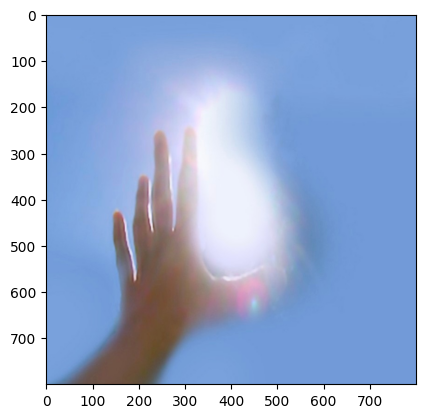

In [6]:
import matplotlib.pyplot as plt
#from matplotlib.image import imread
from skimage.io import imread
%matplotlib inline

image = imread("3lab_p.jpg")
plt.imshow(image)
plt.show()

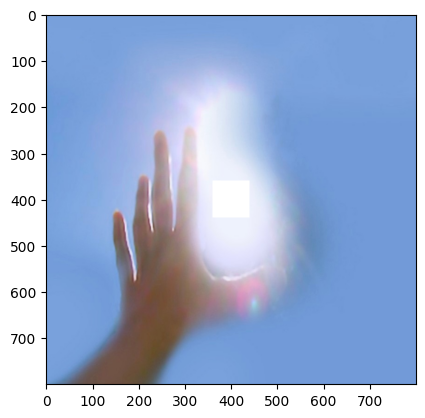

In [2]:
height, width, _ = image.shape
sq_size = int(height * 0.1)
x_center = width // 2
y_center = height // 2

x_min = x_center - (sq_size // 2)
y_min = y_center - (sq_size // 2)

x_max = x_min + sq_size
y_max = y_min + sq_size


image[y_min:y_max,x_min:x_max,:] = 255
plt.imshow(image)
plt.show()

In [ ]:
# 2. Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

In [3]:
import cv2
import numpy as np
from datetime import datetime

def add_square(image):
    height, width, _ = image.shape
    sq_size = 50

    x = np.random.randint(0, width - sq_size)
    y = np.random.randint(0, height - sq_size)

    cv2.rectangle(image, (x, y), (x + sq_size, y + sq_size), (255,255,255), -1)

    return image

url = 'https://example-files.online-convert.com/video/mp4/example_small.mp4'
capture = cv2.VideoCapture(url)

while capture.isOpened():
    rtrn, image = capture.read()

    if not rtrn:
        break

    modified_image = add_square(image)
    cv2.imshow("OpenCV", modified_image)

    if cv2.waitKey(1) & 0xFF == ord('q'): # == 27:
        break

capture.release()
cv2.destroyAllWindows()

In [2]:
# ДЗ №3

In [42]:
import numpy as np
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen
import IPython.display as ipd

audio_url = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/3b812aa828f357df417069600a096c31816c5ef3/dataset/2-114280-A-0.wav'
data, audio_sample = sf.read(io.BytesIO(urlopen(audio_url).read()))
ipd.Audio(audio_url)

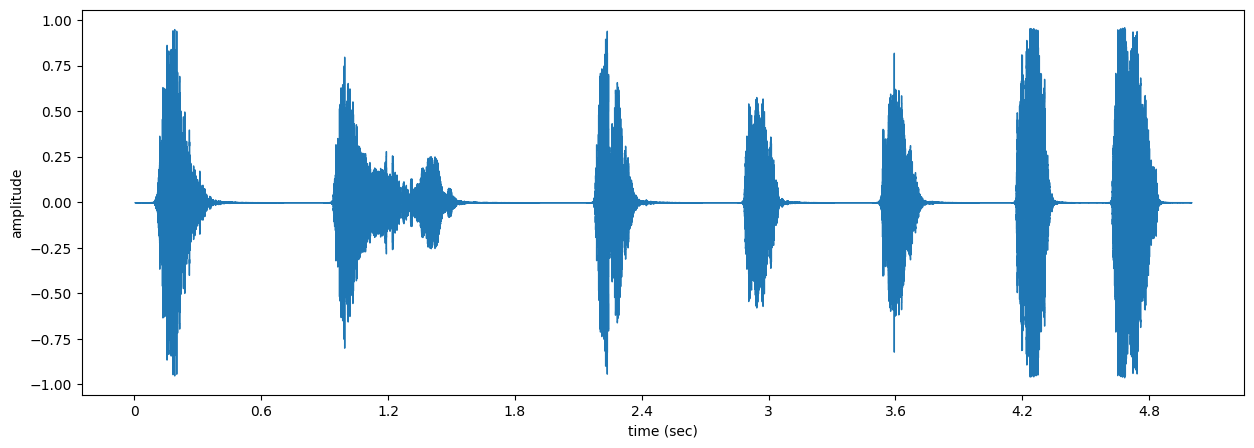

In [7]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=audio_sample)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()

ipd.Audio(audio_url)

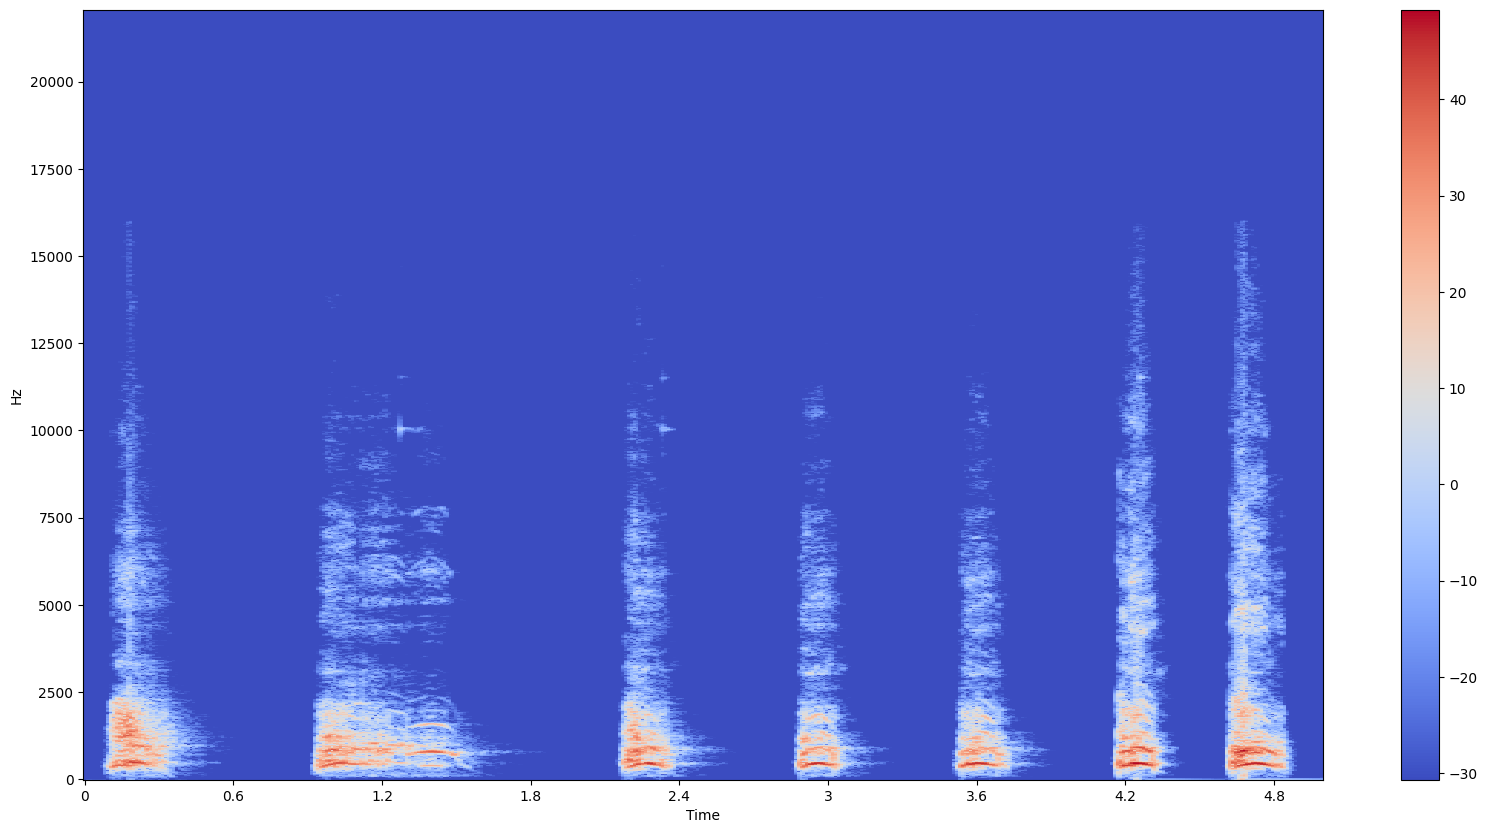

In [8]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 10))
librosa.display.specshow(Xdb, sr=audio_sample, x_axis='time', y_axis='hz')
plt.colorbar()

In [43]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
from IPython.display import Audio, display

audio_data = np.array(data)

threshold = np.mean(librosa.amplitude_to_db(np.abs(audio_data)))
temp_audio_file = AudioSegment.from_file(io.BytesIO(urlopen(audio_url).read()), format="wav")
audio_segments = split_on_silence(temp_audio_file, silence_thresh=threshold)
final_audio = AudioSegment.silent(duration=0)

for segment in audio_segments:
    final_audio += segment
final_audio.export("output_audio.wav", format="wav")
display(Audio('output_audio.wav'))

In [ ]:
# ДЗ №4

In [51]:
import requests
from datetime import datetime

token='vk1.a.rnE0AzefiL25MJCOTiFgEZ49P9rmHndT15VTPESfQlQBEWHktJvc6PnaihCQrAuUNMEyPeRIe7oMcDPixQemKIqsRgPKT6sWCvjGSbNMX8U1k_Ozdwak813y-0zkczm-2EtaawrXti5qjzztJNcO4JRn0NtjPaHS58ZW23YYCNKCmJnao0P0fNiWBKUz8LEj'
# https://vk.com/vtorichniichief
ID = 'vtorichniichief'

num_item = 0
json_response = requests.get(('https://api.vk.com/method/wall.get?count=100&offset={}&domain={}&v=5.103&access_token=' + token).\
                        format(0, ID)).json()

if json_response.get('error'):
    print(json_response.get('error'))
else:
    for item in json_response['response']['items']:
        print(num_item, ": ", datetime.fromtimestamp(item['date']))
        print(item['text'])
        print('--------------')
        num_item += 1



0 :  2023-10-15 17:15:00
Семь смертных грехов — семь дней недели — семь убийств.
--------------
1 :  2023-10-16 13:15:00
Брутальный Майкл Фассбендер в 2008 году.
--------------
2 :  2023-10-16 11:15:00
The Batman, 2022

«Бэтмен» Мэтта Ривза — самый атмосферный кинокомикс последних лет.

Настолько же мрачный, насколько и охрененный в целом. Три часа чистого визуального экстаза.
--------------
3 :  2023-10-15 19:10:00
Райан Гослинг времени даром не теряет.
--------------
4 :  2023-10-15 15:15:00
Долгие месяцы ожидания подходят к концу. «Неуязвимый» или «Непобедимый», как у нас его официально локализовали, прибудет на малые экраны 3 ноября.

Если каким-то чудом пропустили первый сезон, то сейчас самое время посмотреть.
--------------
5 :  2023-10-15 13:15:00
Тому Хиддлстону даже слезы украшение.
--------------
6 :  2023-10-14 21:15:00
Мыловары — метовары.
--------------
7 :  2023-10-14 19:10:00
Я как-то не успел вовремя обсудить с вами трейлер «Железного когтя», но все мы понимаем, что ни